## CMSC 197 Problem Set
### Implementing Linear Regression with Gradient Descent as Optimization Function

<i>Submitted by: Manejo, Kzlyr Shaira</i>
<br>
Github link: https://github.com/kazeulo/CMSC197-Machine-Learning/tree/main/hw3

In [1]:
# import packages
import numpy as np
import pandas as pd

import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for splitting data into train and test sets
from sklearn.model_selection import train_test_split

# for finding r2
from sklearn.metrics import r2_score

# for finding ols
from sklearn.linear_model import LinearRegression

# for finding mse
from sklearn.metrics import mean_squared_error

# for generateing plots
import matplotlib.pyplot as plt

import random

### 1. Load Advertising.csv dataset using pandas

In [2]:
data = pd.read_csv('data/Advertising.csv', encoding = 'latin-1')

In [3]:
# removing  the unnamed:0 column
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 2. Standardizing each column of the dataset

In [4]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data = pd.DataFrame(standardized_data, columns=['TV', 'Radio', 'Newspaper', 'Sales'])
standardized_data.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


### 3. Adding an extra column for bias

In [5]:
standardized_data.insert(0, 'Bias', 1)
standardized_data

,Bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


In [6]:
# idefining the x and y
x = standardized_data.drop(columns=['Sales'])
y = standardized_data['Sales']

### 4. Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [7]:
#splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11, train_size=0.85, test_size=0.15)

print("x_train:", x_train.shape)
print("x_test", x_test.shape)
print("y_train:", x_train.shape)
print("y_test", x_test.shape)

x_train: (170, 4)
x_test (30, 4)
y_train: (170, 4)
y_test (30, 4)


### 5. Fitting the model on the training set

In [8]:
def initialize_weights():
    np.random.seed(10)
    init_w = np.random.rand(4) 
    return init_w

initialize_weights()

array([0.77132064, 0.02075195, 0.63364823, 0.74880388])

In [9]:
# Return predicted values for given inputs X and weights.
def predict(x, weights):
    return np.dot(x, weights)

In [10]:
#Compute the mean squared error cost.
def compute_cost(y, prediction):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((prediction - y) ** 2)
    return cost

In [11]:
#Compute the gradient of the cost function.
def compute_gradient(x, y, weights):
    m = len(y)
    prediction = predict (x, weights)
    error = prediction - y
    gradients = (1 / m) * np.dot(x.T, error)
    return gradients

In [12]:
def update_weights(weights, learning_rate, gradient):
    updated_weights = weights - learning_rate * gradient
    return updated_weights

In [13]:
#Perform gradient descent
def grad_descent(x, y, learning_rate, num_iterations):
    weights_matrix = initialize_weights()
    costs_matrix = []

    for i in range(num_iterations):
        predictions = predict(x, weights_matrix)
        cost = compute_cost(y, predictions)
        costs_matrix.append(cost)

        gradients = compute_gradient(x, y, weights_matrix)
        weights_matrix = update_weights(weights_matrix, gradients, learning_rate)

    return weights_matrix, costs_matrix

In [14]:
#Plot the cost as a function of iteration.
def plot_costs(costs):
    plt.figure(figsize=(15, 4))
    plt.plot(costs)
    plt.title("Cost over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.show()

In [15]:
# defining learning rate and number of iterations
learning_rate = 0.01
iteration_value = 1000

In [55]:
# Run gradient descent with the train set
final_weights_train, train_costs = grad_descent(x_train, y_train, learning_rate, iteration_value)
costs_df = pd.DataFrame(train_costs)

# final weights for train
print("Final weights_train: ", final_weights)
print("Bias: ", final_weights[0])
print("TV: ", final_weights[1])
print("Radio: ", final_weights[2])
print("Newspaper: ", final_weights[3])

Final weights_train:  [ 0.00494629  0.71711769  0.55754737 -0.02140822]
Bias:  0.004946287879674391
TV:  0.7171176892047924
Radio:  0.5575473665161091
Newspaper:  -0.021408217317342694


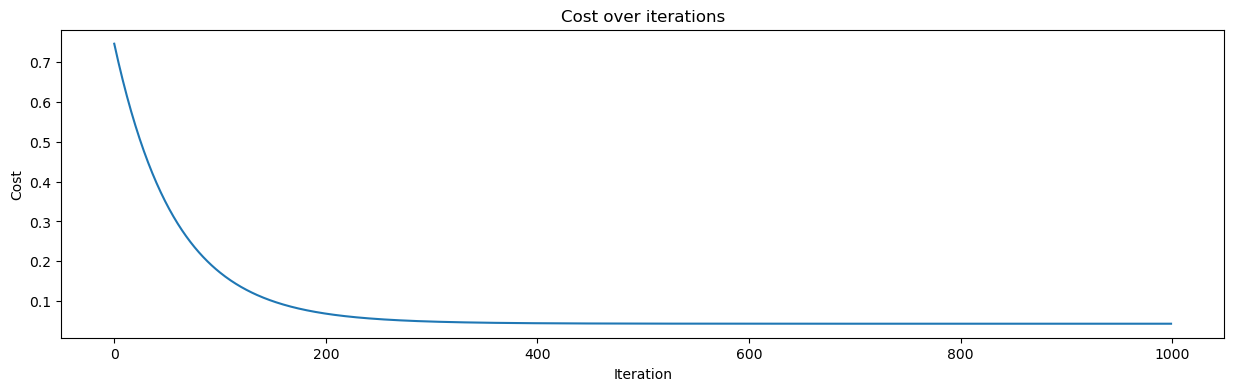

In [56]:
plot_costs(train_costs)

### 6. Predict the quantitative response y on the train set.

In [60]:
# Predict and calculate cost for the train set
train_predictions = predict(x_train, final_weights_train)
train_cost = compute_cost(y_train, train_predictions)

print("Train Set Cost: ", train_cost)
train_comparison_df = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions})

print("\nTrain Set Predictions:")
train_comparison_df.head()

Train Set Cost:  0.04287328949479952

Train Set Predictions:


,Actual,Predicted
135,-0.465472,0.091975
29,-0.676832,-0.917662
25,-0.388614,0.242240
26,0.187822,0.214416
93,1.571268,1.332797


### 7. Predict and calculate cost for the test set

In [52]:
# Predict and calculate cost for the train set
test_predictions = predict(x_test, final_weights_train)
test_cost = compute_cost(y_test, test_predictions)
print("Test Set Cost:", test_cost)

test_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

print("\nTest Set Predictions:")
test_comparison_df.head()

Test Set Cost: 0.10556395481378482

Test Set Predictions:


,Actual,Predicted
174,-0.484686,-0.094506
33,0.648971,0.903492
173,-0.446257,-0.407137
186,-0.715261,-0.850151
22,-1.618343,-1.410265


### 8. Revert back to orginal scale 

In [20]:
# Add a new column which is the predicted sales
y_hat = predict(x_train[['Bias', 'TV', 'Radio', 'Newspaper']], final_weights)

# concatenating the x and y of training set
train_set = x_train
train_set = train_set.drop(columns = ['Bias'])
train_set['Sales'] = y_train
reverted_df = scaler.inverse_transform(train_set)
reverted_df = pd.DataFrame(reverted_df, columns=['TV', 'Radio', 'Newspaper', 'Sales'])

y_mean = reverted_df['Sales'].mean()
y_std = reverted_df['Sales'].std()

# Revert predicted sales to original scale
reverted_predicted_sales = y_hat * y_std + y_mean

# Prepare the data for comparison
reverted_df['Predicted Sales'] = reverted_predicted_sales

#Insert residuals column
reverted_df['Residuals'] = reverted_df['Sales'] - reverted_df['Predicted Sales']

reverted_df

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,48.3,47.0,8.5,11.6,14.519562,-2.919562
1,70.6,16.0,40.8,10.5,9.397303,1.102697
2,262.9,3.5,19.5,12.0,15.281913,-3.281913
3,142.9,29.3,12.6,15.0,15.140754,-0.140754
4,250.9,36.5,72.3,22.2,20.814713,1.385287
...,...,...,...,...,...,...
165,239.8,4.1,36.9,12.3,14.331783,-2.031783
166,28.6,1.5,33.0,7.3,4.884582,2.415418
167,76.4,26.7,22.3,11.8,11.773830,0.026170
168,75.5,10.8,6.0,9.9,8.780371,1.119629


## Questions

### 1. What are the optimal weights found by your implemented gradient descent? 

In [21]:
print("The optimal weights are:",  final_weights)

print("The resulting linear regression model is given by")
print(f"hΘ(x) = {final_weights[0]} + {final_weights[1]}*TV + {final_weights[2]}*Radio + {final_weights[3]}*Newspaper")

The optimal weights are: [ 0.00512346  0.71691813  0.55691842 -0.02055358]
The resulting linear regression model is given by
hΘ(x) = 0.005123464416478392 + 0.7169181286764807*TV + 0.5569184166267073*Radio + -0.02055358142540724*Newspaper


From the resulting model, hΘ(x) reflects the predicted sales based on the coefficients for each variable. The bias term (0.00512346) represents the predicted sales when all input variables (TV, Radio, and Newspaper) are zero. The coefficient for TV has the most significant positive impact (0.71691813) on the sales while the coefficient for newspaper has the lowest impact(-0.02055358).

### 2. Provide a scatter plot of the y_hat and y for both the train and test seet. Is there a trend? Provide an r2 score.

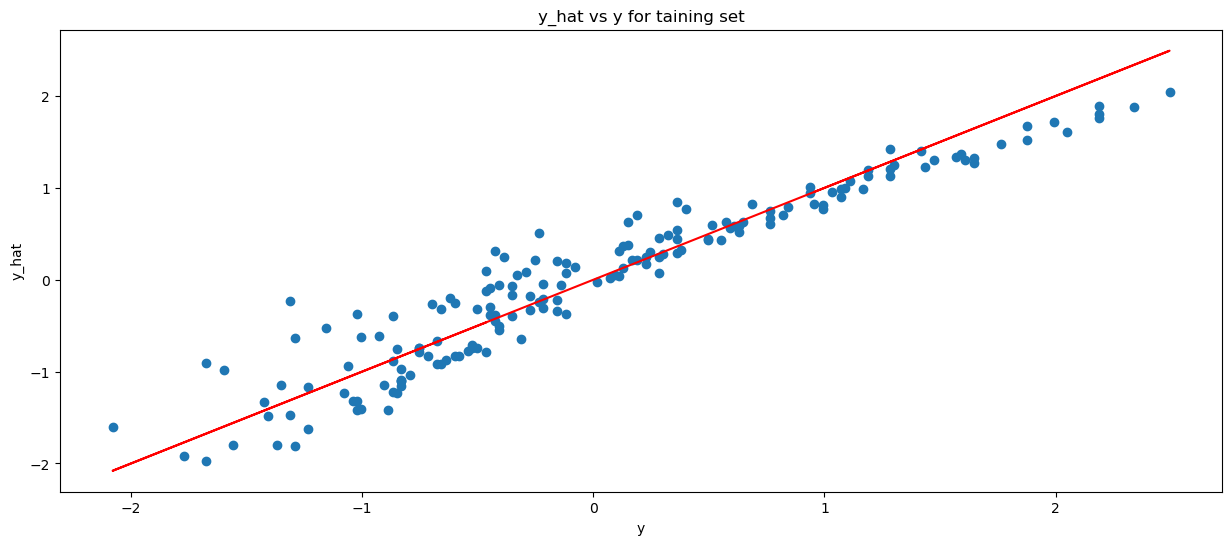

In [22]:
# Scatter plot of actual and predicted y values 
y_hat_train = predict(x_train, final_weights)
plt.figure(figsize=(15, 6))
plt.scatter(y_train, y_hat_train)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('y_hat vs y for taining set')
plt.plot(y_train, y_train, color='red')
plt.show()

In [23]:
#r2 score of the train set
r2_train = r2_score(y_train, y_hat_train)
print("The r2 score is ", r2_train)

The r2 score is  0.9092332336700965


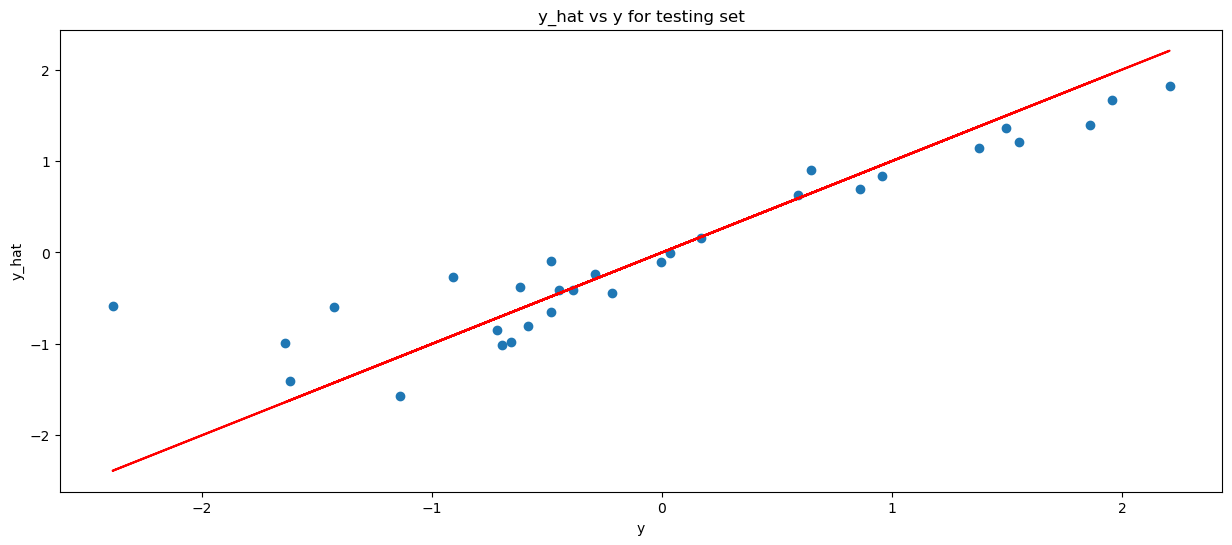

In [24]:
# Scatter plot of actual and predicted y values 
y_hat_test = predict(x_test, final_weights)
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_hat_test)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.title('y_hat vs y for testing set')
plt.plot(y_test, y_test, color='red')
plt.show()

In [25]:
#r2 score of the test set
r2_test = r2_score(y_test, y_hat_test)
print("The r2 score of test set is ", r2_test)

The r2 score of test set is  0.8390944491773407


Based on the scatterplots of 𝑦_hat vs y for both the training and testing sets, we observe a clear linear pattern, indicating a positive linear relationship between our dependent variables and the independent variables. The r2 values further illustrate this relationship: the training set has an r2 score of 0.91, while the testing set has an r2 score of 0.84. A high r2, approaching 1, signifies that our model effectively captures the variance in the data. This difference between the two sets of data might be affected by the amount of data points as well as their nature (it can be seen that there are some outliers in the testing set). Although the training set demonstrates a strong fit, the testing set, while slightly lower, still reflects good predictive performance and can still be further improved.

### 3. What happens to the error, r2, and cost as the number of iterations increase?

In [26]:
# function to calculate R²
def calculate_r2(y, y_hat):
    return r2_score(y, y_hat)

# modified grad_descent function to get R2 values
def grad_descent_with_r2(x, y, learning_rate, num_iterations):
    weights_matrix = initialize_weights()
    costs_matrix = []
    r2_values = []

    for i in range(num_iterations):
        y_hat = predict(x, weights_matrix)
        cost = compute_cost(y, y_hat)
        costs_matrix.append(cost)
        
        # Calculate R² and store it
        r2 = calculate_r2(y, y_hat)
        r2_values.append(r2)

        gradients = compute_gradient(x, y, weights_matrix)
        weights_matrix = update_weights(weights_matrix, learning_rate, gradients)

    return weights_matrix, costs_matrix, r2_values

# Run gradient descent with R² calculations
final_weights, costs, r2_values = grad_descent_with_r2(x_train, y_train, learning_rate, 50000)

<function matplotlib.pyplot.show(close=None, block=None)>

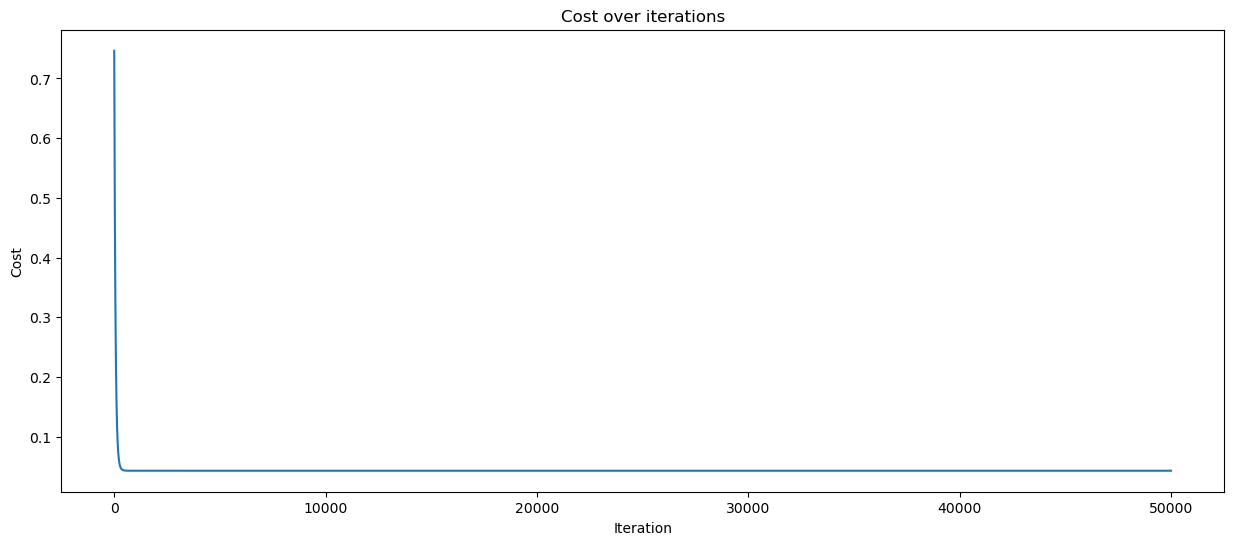

In [27]:
# Plotting costs
plt.figure(figsize=(15, 6))
plt.plot(costs)
plt.title("Cost over iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show

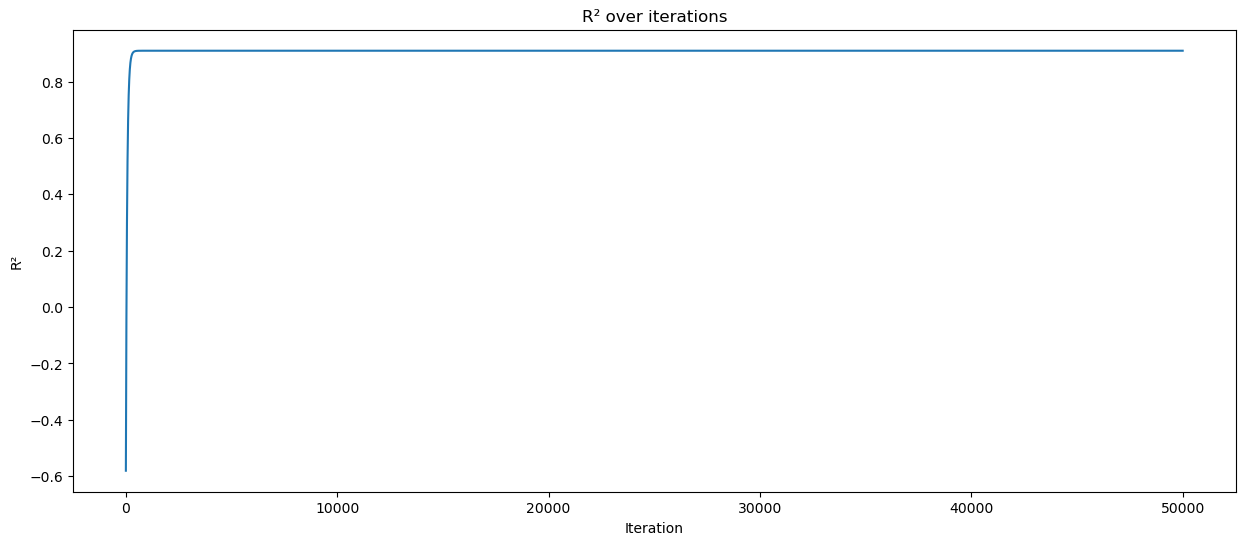

In [28]:
# Plotting r2 values
plt.figure(figsize=(15, 6))
plt.plot(r2_values)
plt.title("R² over iterations")
plt.xlabel("Iteration")
plt.ylabel("R²")
plt.show()

As we can see from the plots, the cost value decreases as the number of iterations increases, indicating that the model's predictions are getting closer to the actual values. On the otherhand, the r2 value increases as the number of iterations increases. This implies that the model explains a larger portion of the variance in the target variable. However, as we can observe from the plots, the difference with 1000 and 50000 iterations is very minor. Hence, we can say that even just 1000 iterations is more than enough to get the minimum cost.

### 4. Checking the effect on the cost and error as learning rate changes. Learning rates used here include 0.2, 0.1, 0.01, 0.001, 0.0001.

In [29]:
# List of learning rates to try
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001]

# Initialize a dictionary to store weights and costs
results = {}

# Run gradient descent for each learning rate
for lr in learning_rates:
    weights, costs = grad_descent(x_train, y_train, lr, 400)
    results[lr] = {'weights': weights, 'costs': costs}

# Initialize a dictionary to store costs DataFrames
cost_dfs = {lr: pd.DataFrame(data['costs'], columns=['Cost']) for lr, data in results.items()}

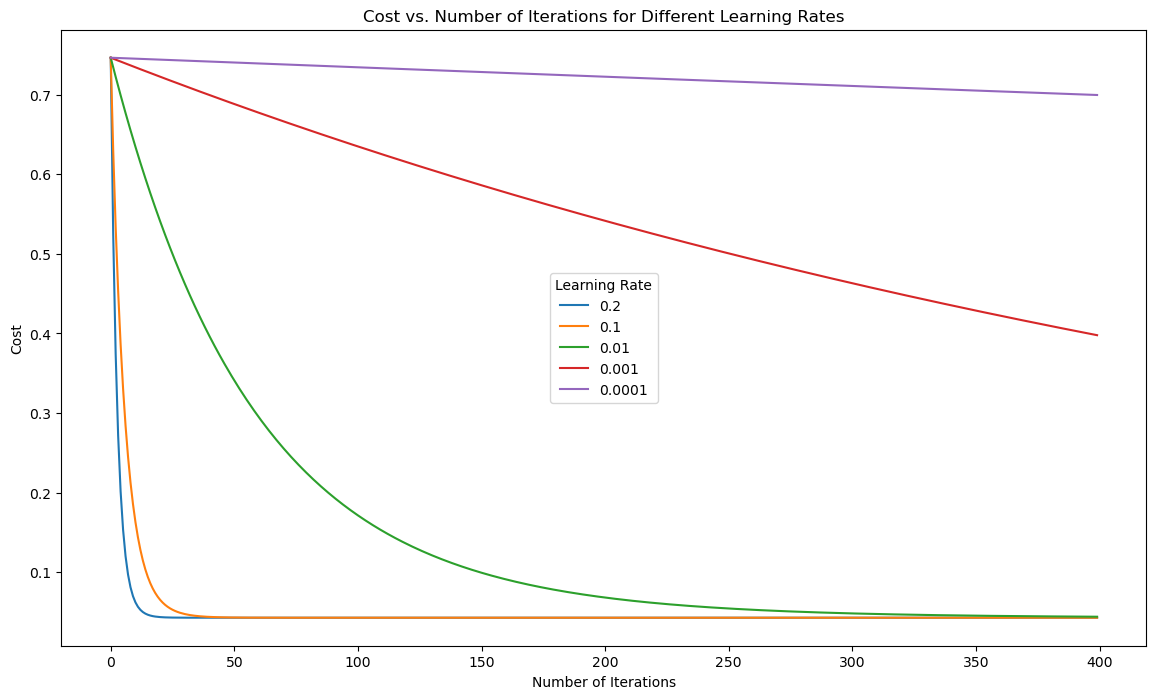

In [30]:
# Concatenate all costs into one DataFrame
df_costs = pd.concat(cost_dfs.values(), axis=1)
df_costs.columns = [str(lr) for lr in learning_rates]  # Assign learning rates as columns

# Reset index to get a simple range index
df_costs.reset_index(drop=False, inplace=True)

# Define dimensions for the plot
fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

# dataframe for plotting
df = df_costs.melt(id_vars='index', var_name='Learning Rate', value_name='Cost')

# Call lineplot of seaborn
sns.lineplot(data=df, x='index', y='Cost', hue='Learning Rate', ax=ax)
plt.title("Cost vs. Number of Iterations for Different Learning Rates")
plt.show()

As we can observe from the figure above, when the learning rate is too small, such as 0.0001 or 0.001, the cost remains high and decreases very slowly. This indicates that the model is making minimal progress toward minimizing the cost, which can lead to long training times. On the other hand, when the learning rate is high, like 0.1 or 0.2, the cost function shows significant fluctuations, often overshooting the minimum and leading to instability. 

### 5. Is there a relationship on the learning rate and the number of iterations?

With higher learning rate, finding the minimum cost may require less number of iterations but it may also cause the algorithm to overshoot the minimum cost when the iteration is higher than the optimal. On the otherhand a lower learning rate provides more precise updates on the minimum cost but it requires more iterations, taking too much time and requiring more resources.

Therefore, it is important to find the balance between the learning rate and number of iterations for efficient model training. An optimal learning rate can help achieve the minimum cost with fewer iterations, using time and resources effectively.

### 6. Compare the results with the results of ordinary least squares function.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the OLS model
ols_model = LinearRegression()
ols_model.fit(x_train, y_train)

# Get predictions for both training and testing sets
ols_predictions_train = ols_model.predict(x_train)
ols_predictions_test = ols_model.predict(x_test)

# Calculate R² scores
ols_r2_train = r2_score(y_train, ols_predictions_train)
ols_r2_test = r2_score(y_test, ols_predictions_test)

# Get the OLS weights
ols_weights = np.insert(ols_model.coef_, 0, ols_model.intercept_)

In [62]:
print("Gradient Descent Final Weights:", final_weights)
print("OLS Weights:", ols_weights)
print("\n")

print("Gradient Descent R2 score (train):", r2_train)
print("Gradient Descent R2 score (test):", r2_test)
print("\n")
print("OLS R2 score (train):", ols_r2_train)
print("OLS R2 score (test):", ols_r2_test)

Gradient Descent Final Weights: [ 0.00494629  0.71711769  0.55754737 -0.02140822]
OLS Weights: [ 0.00494629  0.          0.71711769  0.55754737 -0.02140822]


Gradient Descent R2 score (train): 0.9092332336700965
Gradient Descent R2 score (test): 0.8390944491773407


OLS R2 score (train): 0.909234055500149
OLS R2 score (test): 0.8389920333189634


The r2 score of gradient descent is slightly higher compared to the r2 score of OLS function, hence we can say that the gradient descent performed better.